In [9]:
from typing import List, Dict

# Sample data
sales_data = [
    {"item": "apple", "quantity": 10, "price_per_unit": 0.5},
    {"item": "banana", "quantity": 5, "price_per_unit": 0.2},
    {"item": "cherry", "quantity": 20, "price_per_unit": 1.5},
]

def filter_data(data: List[Dict], min_quantity: int) -> List[Dict]:
    return [item for item in data if item["quantity"] >= min_quantity]

def normalize_prices(data: List[Dict]) -> List[Dict]:
    max_price = max(item["price_per_unit"] for item in data)
    return [{**item, "price_per_unit": item["price_per_unit"] / max_price} for item in data]

def apply_discount(data: List[Dict], discount_rate: float) -> List[Dict]:
    return [{**item, "price_per_unit": item["price_per_unit"] * (1 - discount_rate)} for item in data]

def transform_data(data: List[Dict]) -> List[Dict]:
    return [{**item, "total_price": item["quantity"] * item["price_per_unit"]} for item in data]

def summarize_data(data: List[Dict]) -> Dict:
    total_quantity = sum(item["quantity"] for item in data)
    total_price = sum(item["total_price"] for item in data)
    return {"total_quantity": total_quantity, "total_price": total_price}

# Example usage
filtered_data = filter_data(sales_data, 10)
normalized_data = normalize_prices(filtered_data)
discounted_data = apply_discount(normalized_data, 0.1)
transformed_data = transform_data(discounted_data)
summary = summarize_data(transformed_data)

print("Filtered Data:", filtered_data)
print("Normalized Data:", normalized_data)
print("Discounted Data:", discounted_data)
print("Transformed Data:", transformed_data)
print("Summary:", summary)


Filtered Data: [{'item': 'apple', 'quantity': 10, 'price_per_unit': 0.5}, {'item': 'cherry', 'quantity': 20, 'price_per_unit': 1.5}]
Normalized Data: [{'item': 'apple', 'quantity': 10, 'price_per_unit': 0.3}, {'item': 'cherry', 'quantity': 20, 'price_per_unit': 0.9}]
Discounted Data: [{'item': 'apple', 'quantity': 10, 'price_per_unit': 0.3}, {'item': 'cherry', 'quantity': 20, 'price_per_unit': 0.9}]
Transformed Data: [{'item': 'apple', 'quantity': 10, 'price_per_unit': 0.3, 'total_price': 3.0}, {'item': 'cherry', 'quantity': 20, 'price_per_unit': 0.9, 'total_price': 18.0}]
Summary: {'total_quantity': 30, 'total_price': 21.0}


In [24]:
from datetime import datetime

class Task:
    def __init__(self, title, description, due_date=None):
        self.title = title
        self.description = description
        self.completed = False
        self.due_date = datetime.strptime(due_date, "%Y-%m-%d") if due_date else None

    def mark_complete(self):
        self.completed = True

    def __str__(self):
        due_date_str = self.due_date.strftime("%Y-%m-%d") if self.due_date else "No due date"
        return f"Task('{self.title}', Due: {due_date_str}, Completed: {self.completed})"

class TaskManager:
    def __init__(self):
        self.tasks = []

    def add_task(self, title, description, due_date=None):
        task = Task(title, description, due_date)
        self.tasks.append(task)

    def list_tasks(self):
        for task in self.tasks:
            print(task)

    def list_completed_tasks(self):
        for task in self.tasks:
            if task.completed:
                print(task)

    def list_with_priority(self):
        sorted_tasks = sorted(self.tasks, key=lambda task: task.due_date or datetime.max)
        for task in sorted_tasks:
            print(task)

# Example Usage
if __name__ == "__main__":
    manager = TaskManager()
    manager.add_task("Buy groceries", "Milk, Bread, Eggs", "2023-05-01")
    manager.add_task("Read book", "Read 'Clean Code' book", "2023-04-25")
    manager.add_task("Pay bills", "Electricity and Internet", "2023-04-20")
    manager.add_task("Exercise", "Go for a run", None)
    print("All Tasks:")
    manager.list_tasks()
    print("\nTasks with Priority:")
    manager.list_with_priority()

All Tasks:
Task('Buy groceries', Due: 2023-05-01, Completed: False)
Task('Read book', Due: 2023-04-25, Completed: False)
Task('Pay bills', Due: 2023-04-20, Completed: False)
Task('Exercise', Due: No due date, Completed: False)

Tasks with Priority:
Task('Pay bills', Due: 2023-04-20, Completed: False)
Task('Read book', Due: 2023-04-25, Completed: False)
Task('Buy groceries', Due: 2023-05-01, Completed: False)
Task('Exercise', Due: No due date, Completed: False)


In [22]:
import numpy as np
from typing import List, Tuple
from sklearn.preprocessing import OneHotEncoder

class NearestNeighborRetriever:
    def __init__(self, data: List[Tuple[float, str]]):
        self.data = np.array(data, dtype=object)
        self.encoder = OneHotEncoder(sparse=False)
        self._fit_encoder()
    
    def _fit_encoder(self):
        categorical_data = [point[1] for point in self.data]
        categorical_data = np.array(categorical_data).reshape(-1, 1)
        self.encoder.fit(categorical_data)
    
    def euclidean_distance(self, point1: np.ndarray, point2: np.ndarray) -> float:
        return np.sqrt(np.sum((point1 - point2) ** 2))
    
    def manhattan_distance(self, point1: np.ndarray, point2: np.ndarray) -> float:
        return np.sum(np.abs(point1 - point2))
    
    def encode_categorical(self, data: List[str]) -> np.ndarray:
        return self.encoder.transform(np.array(data).reshape(-1, 1))
    
    def preprocess_data(self, data: List[Tuple[float, str]]) -> np.ndarray:
        numerical_data = np.array([point[0] for point in data])
        categorical_data = [point[1] for point in data]
        categorical_encoded = self.encode_categorical(categorical_data)
        return np.hstack((numerical_data.reshape(-1, 1), categorical_encoded))
    
    def find_nearest_neighbors(self, query_point: Tuple[float, str], k: int, distance_metric="euclidean") -> List[Tuple[float, str]]:
        processed_data = self.preprocess_data(self.data)
        query_point_preprocessed = self.preprocess_data([query_point])  # Preprocess the query point in the same way as the data
        if distance_metric == "euclidean":
            distances = [self.euclidean_distance(query_point_preprocessed, point) for point in processed_data]
        elif distance_metric == "manhattan":
            distances = [self.manhattan_distance(query_point_preprocessed, point) for point in processed_data]
        else:
            raise ValueError("Unsupported distance metric")
        nearest_indices = np.argsort(distances)[:k]
        return [self.data[i] for i in nearest_indices]

# Example Usage
data_points = [(1.0, 'apple'), (2.0, 'banana'), (3.0, 'cherry'), (6.0, 'banana')]
nn_retriever = NearestNeighborRetriever(data_points)
query_point = (2.5, 'banana')
k = 2
nearest_neighbors = nn_retriever.find_nearest_neighbors(query_point, k, distance_metric="manhattan")
print(f"Nearest neighbors to {query_point} using Manhattan distance: {nearest_neighbors}")


Nearest neighbors to (2.5, 'banana') using Manhattan distance: [array([2.0, 'banana'], dtype=object), array([3.0, 'cherry'], dtype=object)]


/Users/r4yen/miniconda3/envs/ds/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


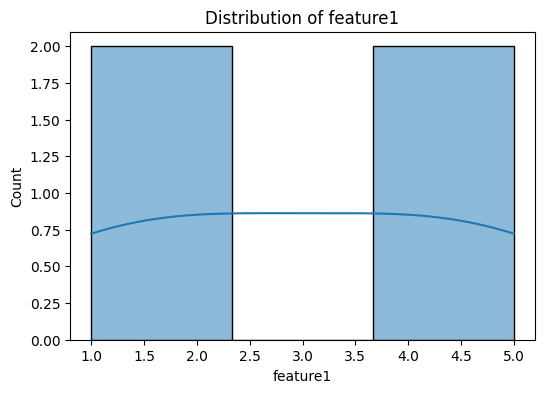

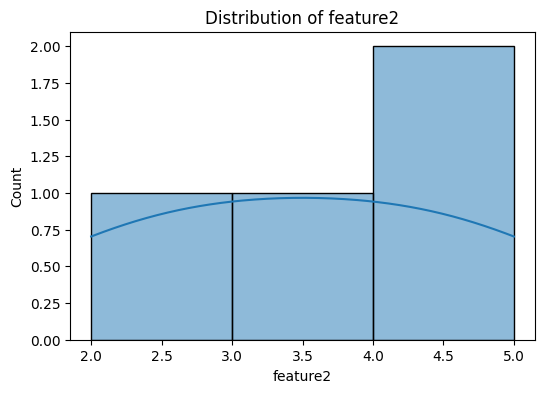

   feature1  feature2  label
0      0.00  0.000000      0
1      0.25       NaN      1
2       NaN  0.333333      0
3      0.75  0.666667      1
4      1.00  1.000000      1


In [28]:
import numpy as np
import pandas as pd
from typing import List, Dict
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Sample data
data = {
    'feature1': [1.0, 2.0, np.nan, 4.0, 5.0],
    'feature2': [2.0, np.nan, 3.0, 4.0, 5.0],
    'label': [0, 1, 0, 1, 1]
}
df = pd.DataFrame(data)

class DataProcessor:
    def __init__(self, dataframe: pd.DataFrame):
        self.dataframe = dataframe

    def preprocess(self) -> pd.DataFrame:
        return self.dataframe

    def visualize_distribution(self):
        feature_columns = self.dataframe.columns.drop('label')
        for column in feature_columns:
            plt.figure(figsize=(6, 4))
            sns.histplot(self.dataframe[column].dropna(), kde=True)
            plt.title(f'Distribution of {column}')
            plt.show()

    def scale_features(self) -> pd.DataFrame:
        scaler = MinMaxScaler()
        feature_columns = self.dataframe.columns.drop('label')
        self.dataframe[feature_columns] = scaler.fit_transform(self.dataframe[feature_columns])
        return self.dataframe

# Example usage
processor = DataProcessor(df)
processor.visualize_distribution()
processed_df = processor.scale_features()
print(processed_df)

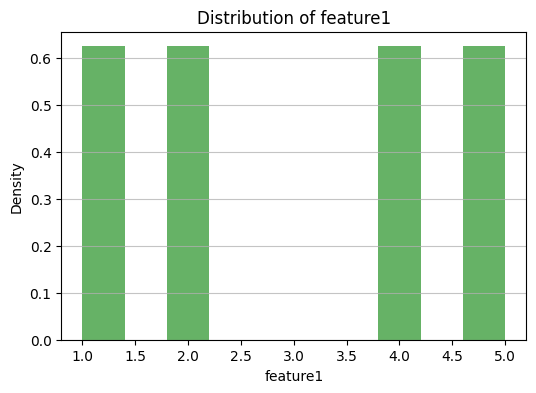

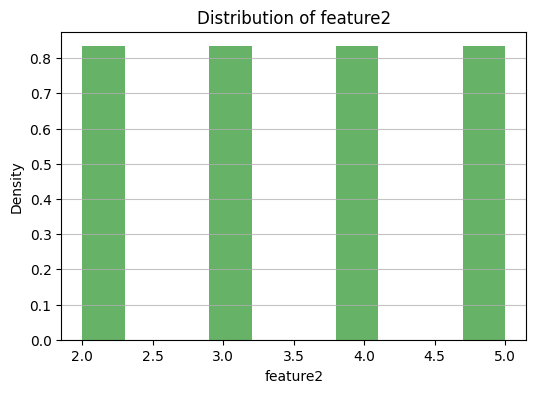

In [2]:
import numpy as np
import pandas as pd
from typing import List, Dict
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Sample data
data = {
    'feature1': [1.0, 2.0, np.nan, 4.0, 5.0],
    'feature2': [2.0, np.nan, 3.0, 4.0, 5.0],
    'label': [0, 1, 0, 1, 1]
}
df = pd.DataFrame(data)

class DataProcessor:
    def __init__(self, dataframe: pd.DataFrame):
        self.dataframe = dataframe

    def preprocess(self) -> pd.DataFrame:
        return self.dataframe

    def visualize_distribution(self):
        feature_columns = self.dataframe.columns.drop('label')
        for column in feature_columns:
            plt.figure(figsize=(6, 4))
            plt.hist(self.dataframe[column].dropna(), bins=10, density=True, alpha=0.6, color='g')
            plt.title(f'Distribution of {column}')
            plt.ylabel('Density')
            plt.xlabel(column)
            plt.grid(axis='y', alpha=0.75)
            plt.show()

    def scale_features(self) -> pd.DataFrame:
        scaler = MinMaxScaler()
        feature_columns = self.dataframe.columns.drop('label')
        self.dataframe[feature_columns] = scaler.fit_transform(self.dataframe[feature_columns])
        return self.dataframe

# Example usage
processor = DataProcessor(df)
processor.visualize_distribution()
processed_df = processor.scale_features()
# print(processed_df)